In [1]:
# chapter 2 question 1
library(raster)
r <- getData("worldclim",var="bio",res=10)
e <- extent(150,170,-60,-40)
data <- data.frame(na.omit(extract(r, e)))
names(data) <- c("temp.mean","temp.diurnal.range", "isothermality",
                 "temp.season","max.temp","min.temp","temp.ann.range","temp.wettest",
                 "temp.driest","temp.mean.warmest","temp.mean.coldest","precip",
                 "precip.wettest.month","precip.driest","precip.season",
                 "precip.wettest.quarter","precip.driest.quarter",
                 "precip.warmest","precip.coldest")

Loading required package: sp



In [2]:
# (a) Perform a scaled PCA on the data
pca <- prcomp(data, scale=TRUE)

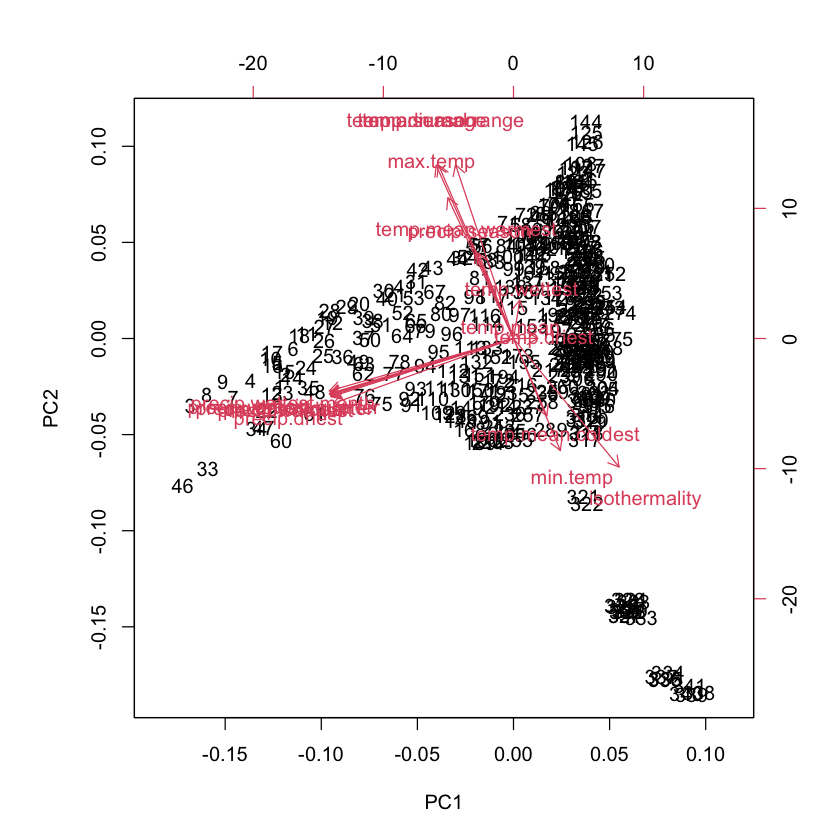

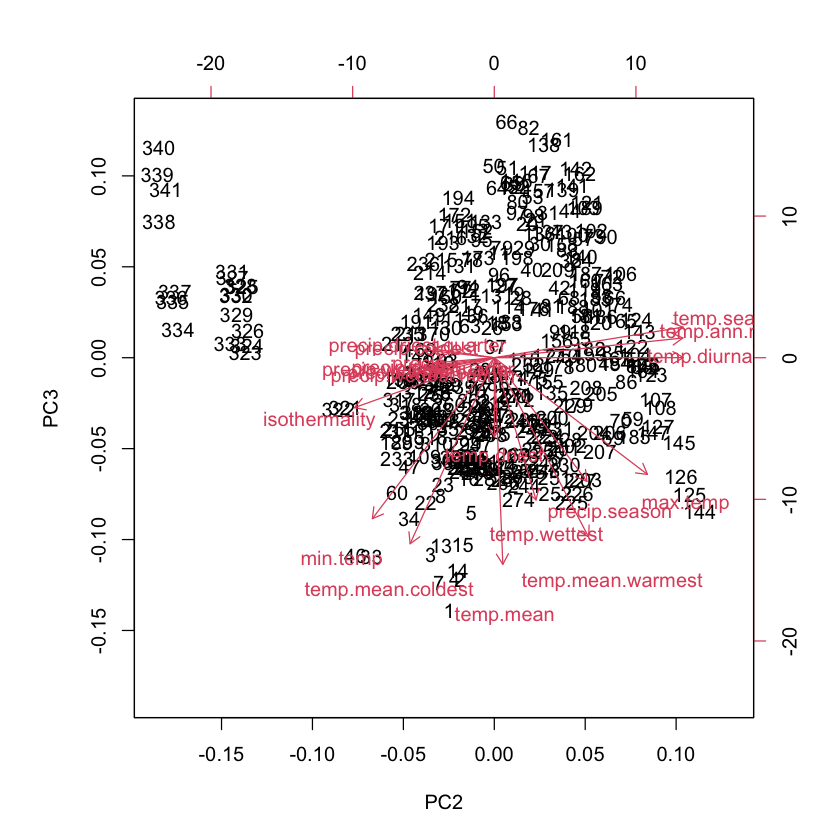

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.7091 2.2335 2.1121 1.02958 0.73430 0.62125 0.43738
Proportion of Variance 0.3863 0.2626 0.2348 0.05579 0.02838 0.02031 0.01007
Cumulative Proportion  0.3863 0.6488 0.8836 0.93942 0.96780 0.98811 0.99818
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.13300 0.09678 0.05643 0.04207 0.03356 0.02372 0.01822
Proportion of Variance 0.00093 0.00049 0.00017 0.00009 0.00006 0.00003 0.00002
Cumulative Proportion  0.99911 0.99960 0.99977 0.99986 0.99992 0.99995 0.99997
                          PC15    PC16     PC17     PC18      PC19
Standard deviation     0.01609 0.01277 0.009734 0.007947 3.466e-16
Proportion of Variance 0.00001 0.00001 0.000000 0.000000 0.000e+00
Cumulative Proportion  0.99998 0.99999 1.000000 1.000000 1.000e+00

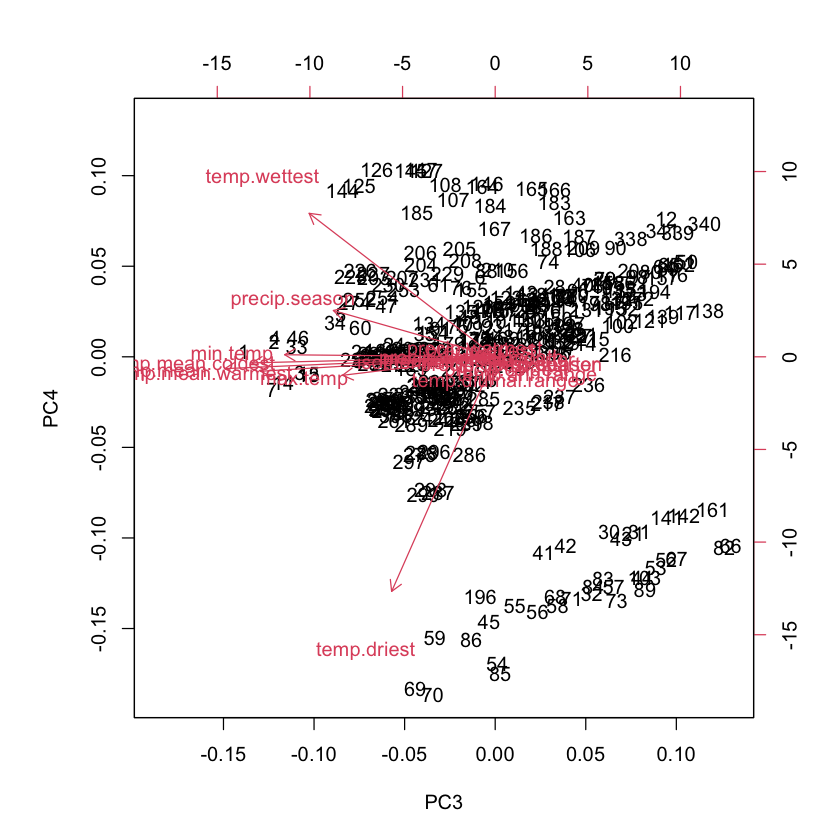

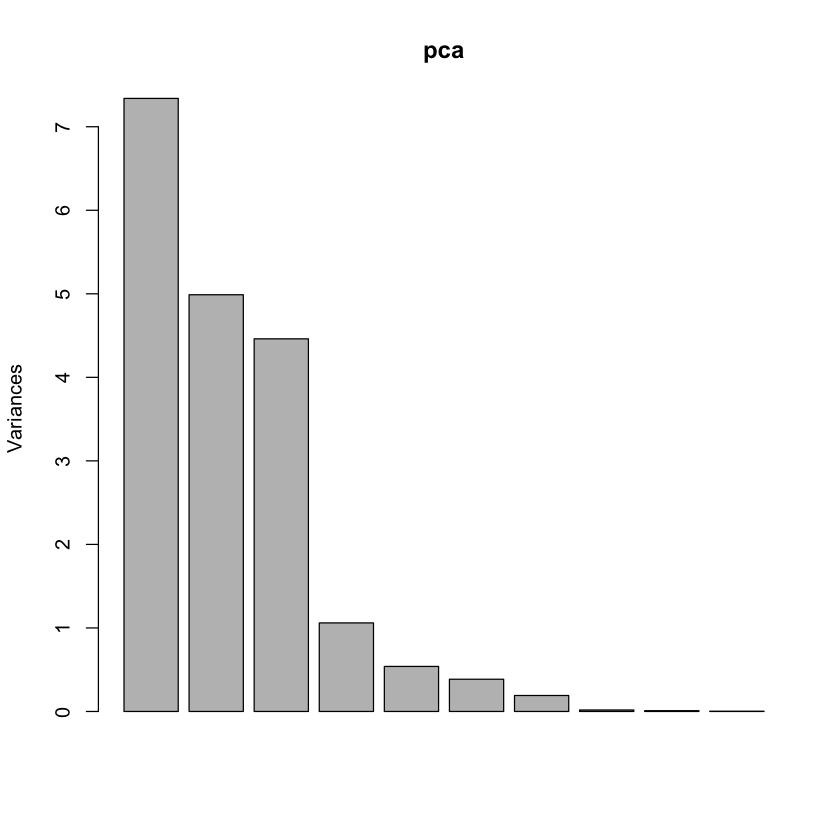

In [4]:
# (b) Produce a biplot and scree plot of the data
biplot(pca)
biplot(pca, choices = 2:3)
biplot(pca, choices = 3:4)
summary(pca)
plot(pca)
pca$

In [ ]:
# (c) How many important axes of variation are there in global temperature and precipitation 
# on the basis of this data? Describe each axis, but if you write more than a sentence per axis 
# you are writing too much.

# 4 important axes of variation
# PC1: 0.3863   precip
# PC2: 0.2626   temp.diurnal.range 
# PC3: 0.2348   temp.mean
# PC4: 0.05579. temp.driest

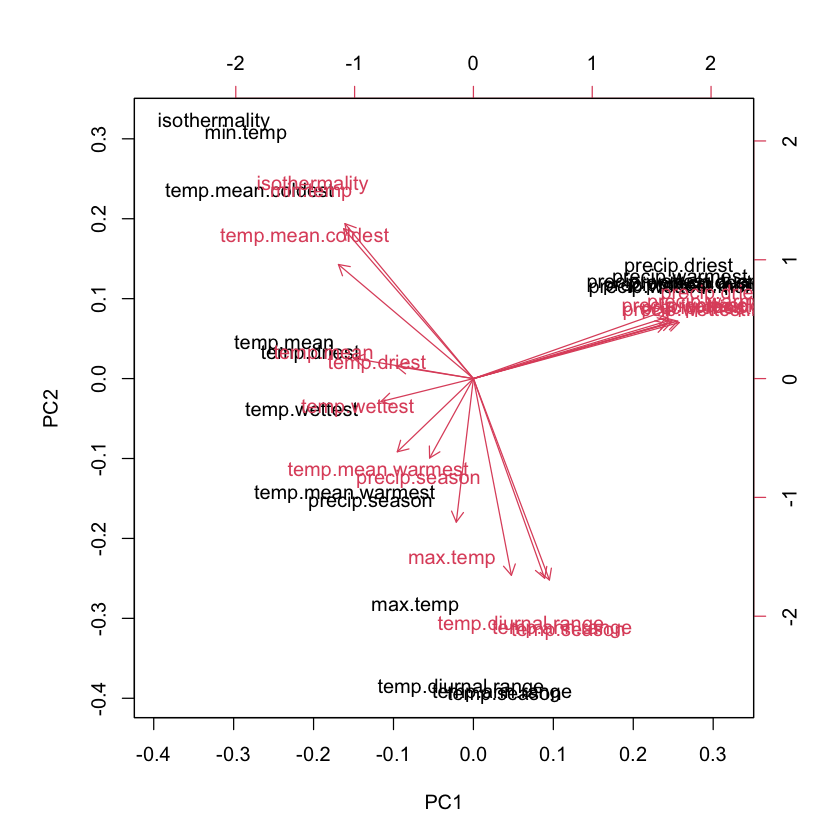

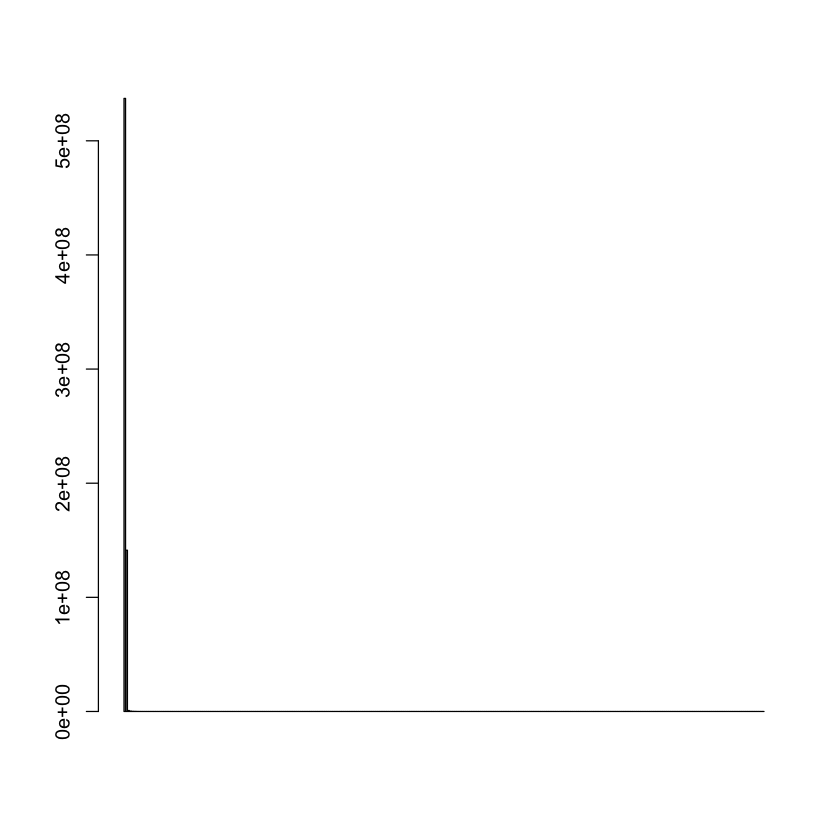

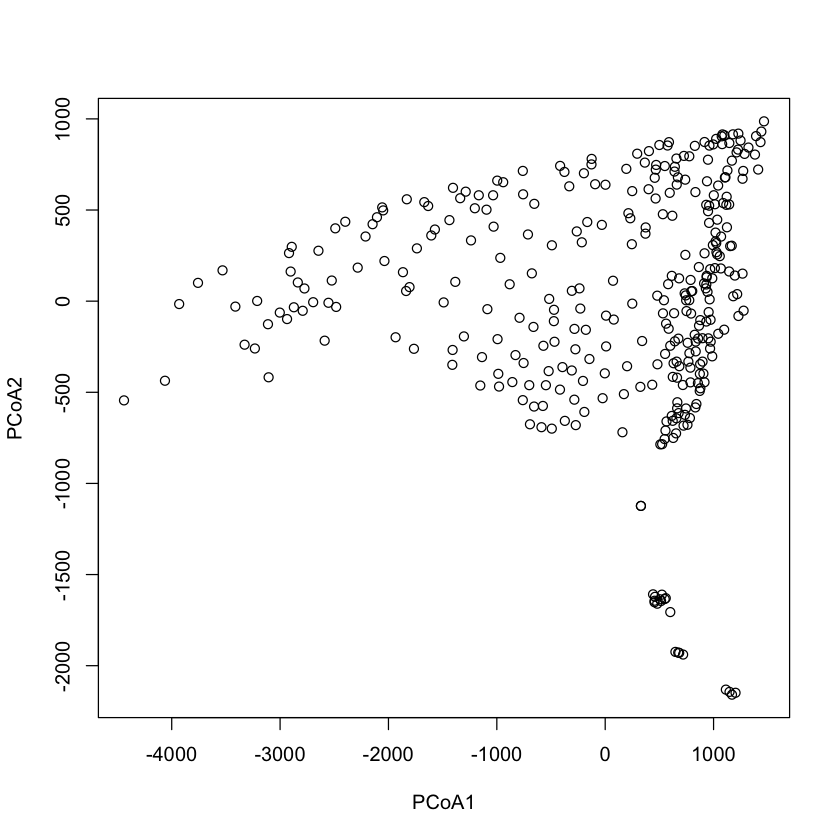

In [6]:
# (d) Calculate the correlation matrix for these data, and use it to confirm 
# for yourself the conception links between a PCA and PCoA
pca.d <- prcomp(cor(data)) 
biplot(pca.d)

library(vegan)
dist <- dist(data)
pcoa <- cmdscale(dist, eig=TRUE)
barplot(pcoa$eig)
plot(pcoa$points[,1:2], xlab='PCoA1', ylab = 'PCoA2')

Run 0 stress 0.001507109 
Run 1 stress 0.09705239 
Run 2 stress 0.08084495 
Run 3 stress 0.1209675 
Run 4 stress 0.1062506 
Run 5 stress 0.08168217 
Run 6 stress 0.1073833 
Run 7 stress 0.09584178 
Run 8 stress 0.07238916 
Run 9 stress 0.09059468 
Run 10 stress 0.08924064 
Run 11 stress 0.04216731 
Run 12 stress 0.08170511 
Run 13 stress 0.08091773 
Run 14 stress 0.06131352 
Run 15 stress 0.07094677 
Run 16 stress 0.06203984 
Run 17 stress 0.07229193 
Run 18 stress 0.07283098 
Run 19 stress 0.108202 
Run 20 stress 0.1239409 
*** No convergence -- monoMDS stopping criteria:
     8: stress ratio > sratmax
    12: scale factor of the gradient < sfgrmin


species scores not available



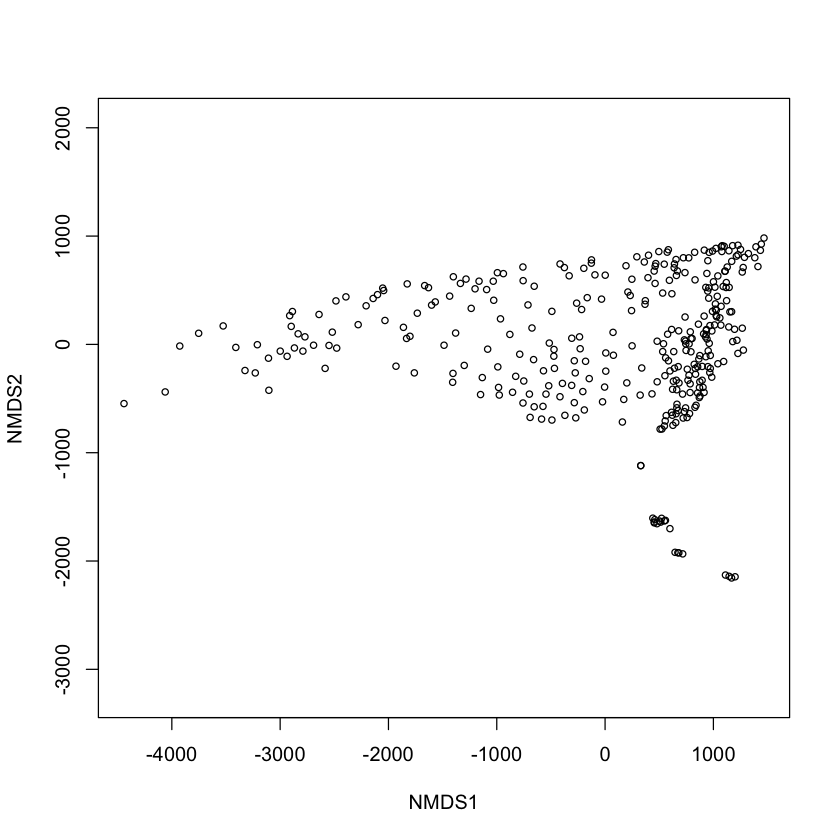

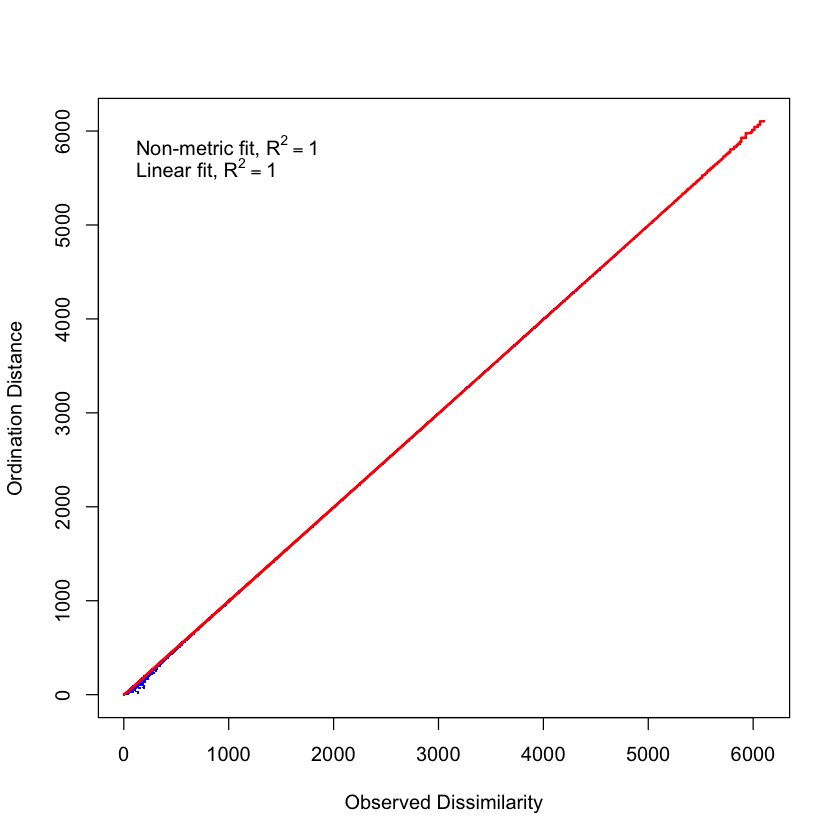

In [9]:
# (e) Perform an NMDS on these data. Do you learn anything more or less than 
# the PCA and PCoA
nmds <- metaMDS(dist)
plot(nmds)
stressplot(nmds)
